In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [4]:
max_depth_arr=np.arange(2,20)
max_depth_arr

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [5]:
accuracy_valid = []
accuracy_train = []
for val in max_depth_arr:
    clf = DecisionTreeClassifier(max_depth=val, random_state=42)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    y_pred_train=clf.predict(X_train)
    acc_valid= accuracy_score(y_valid,y_pred)
    acc_train =accuracy_score(y_train,y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'val={val}\n\tacc_valid={acc_valid}\n\tacc_train={acc_train}\n')

val=2
	acc_valid=0.7757847533632287
	acc_train=0.8023952095808383

val=3
	acc_valid=0.8026905829596412
	acc_train=0.8323353293413174

val=4
	acc_valid=0.8071748878923767
	acc_train=0.842814371257485

val=5
	acc_valid=0.7982062780269058
	acc_train=0.8502994011976048

val=6
	acc_valid=0.7713004484304933
	acc_train=0.8577844311377245

val=7
	acc_valid=0.8071748878923767
	acc_train=0.875748502994012

val=8
	acc_valid=0.7623318385650224
	acc_train=0.8967065868263473

val=9
	acc_valid=0.7713004484304933
	acc_train=0.9131736526946108

val=10
	acc_valid=0.7443946188340808
	acc_train=0.9341317365269461

val=11
	acc_valid=0.757847533632287
	acc_train=0.9491017964071856

val=12
	acc_valid=0.7309417040358744
	acc_train=0.9580838323353293

val=13
	acc_valid=0.7443946188340808
	acc_train=0.9700598802395209

val=14
	acc_valid=0.7354260089686099
	acc_train=0.9760479041916168

val=15
	acc_valid=0.7219730941704036
	acc_train=0.9790419161676647

val=16
	acc_valid=0.726457399103139
	acc_train=0.9790419161

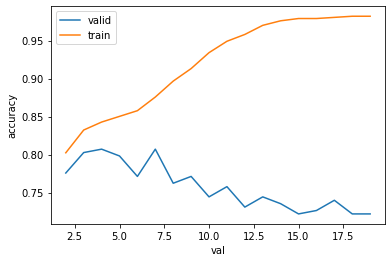

In [6]:
plt.plot(max_depth_arr,accuracy_valid)
plt.plot(max_depth_arr,accuracy_train)
plt.xlabel('val')
plt.ylabel('accuracy')
plt.legend(['valid','train'])

In [19]:
clf = DecisionTreeClassifier(max_depth=7,random_state=42)

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [21]:
y_pred=clf.predict(X_valid)

In [22]:
accuracy_score(y_valid,y_pred)

0.8071748878923767

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
from sklearn.model_selection import GridSearchCV

In [29]:
parametrs = [{'n_estimators':[150,200,250],
             'max_features':np.arange(5,9),
             'max_depth':np.arange(5,10)}]

In [30]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                  param_grid=parametrs,
                  scoring='accuracy',
                  cv=5)

In [31]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': array([5, 6, 7, 8, 9]),
                          'max_features': array([5, 6, 7, 8]),
                          'n_estimators': [150, 200, 250]}],
             scoring='accuracy')

In [32]:
clf.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}

In [33]:
pred = clf.predict(X_valid)
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0])

In [34]:
accuracy_score(y_valid,y_pred)

0.8071748878923767

### Равносильно

In [35]:
clf = RandomForestClassifier(n_estimators=200, max_depth=5,max_features=5,random_state=42)

In [36]:
clf.fit(X_train,y_train)
pred= clf.predict(X_valid)
accuracy_score(y_valid,y_pred)

0.8071748878923767